In [1]:
!pip install kaggle

# Upload kaggle.json (your API key)
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"meherchintamakula","key":"30e91bc1dcff937a15106b88351246ef"}'}

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d drkhaledmohsin/national-heart-foundation-2023-ecg-dataset
!unzip national-heart-foundation-2023-ecg-dataset.zip -d /content/ecg_images


Dataset URL: https://www.kaggle.com/datasets/drkhaledmohsin/national-heart-foundation-2023-ecg-dataset
License(s): CC0-1.0
 97% 921M/949M [00:08<00:00, 182MB/s]
100% 949M/949M [00:08<00:00, 121MB/s]
Archive:  national-heart-foundation-2023-ecg-dataset.zip
  inflating: /content/ecg_images/ECG Data/Abnormal Heartbeat Patients/HB(1) - Copy.jpg  
  inflating: /content/ecg_images/ECG Data/Abnormal Heartbeat Patients/HB(1).jpg  
  inflating: /content/ecg_images/ECG Data/Abnormal Heartbeat Patients/HB(10) - Copy.jpg  
  inflating: /content/ecg_images/ECG Data/Abnormal Heartbeat Patients/HB(10).jpg  
  inflating: /content/ecg_images/ECG Data/Abnormal Heartbeat Patients/HB(100) - Copy.jpg  
  inflating: /content/ecg_images/ECG Data/Abnormal Heartbeat Patients/HB(100).jpg  
  inflating: /content/ecg_images/ECG Data/Abnormal Heartbeat Patients/HB(101) - Copy.jpg  
  inflating: /content/ecg_images/ECG Data/Abnormal Heartbeat Patients/HB(101).jpg  
  inflating: /content/ecg_images/ECG Data/Abnormal

In [16]:
!cp -r /content/ecg_images/ /content/drive/MyDrive/


In [2]:
!pip install numpy==1.23.5 --force-reinstall


  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
pymc 5.25.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
xarray-einstats 0.9.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompat

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
import os
print(os.listdir('/content/drive/MyDrive/ecg_images'))

['ECG Data']


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_gen = datagen.flow_from_directory(
    '/content/drive/MyDrive/ecg_images',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    '/content/drive/MyDrive/ecg_images',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2319 images belonging to 1 classes.
Found 579 images belonging to 1 classes.


In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in base.layers:
    layer.trainable = False

x = Flatten()(base.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
# Output is placeholder before quantum layer
prequantum = Dense(64, activation='relu')(x)


In [23]:
!pip install pennylane==0.29
!pip install "pennylane[qml]"


INFO: pip is looking at multiple versions of pennylane-lightning to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of pennylane-lightning to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 31.3

In [22]:
import pennylane as qml
from pennylane.qnn import KerasLayer

dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def circuit(inputs, weights):
    for idx, val in enumerate(inputs[:4]):
        qml.RY(val, wires=idx)
    qml.templates.StronglyEntanglingLayers(weights, wires=range(4))
    return [qml.expval(qml.PauliZ(i)) for i in range(4)]

weight_shapes = {"weights": (3, 4, 3)}
qlayer = KerasLayer(circuit, weight_shapes, output_dim=4)

from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

inp = Input(shape=(64,))
q_out = qlayer(inp)
final = Dense(train_gen.num_classes, activation='softmax')(q_out)
model_q = Model(inputs=base.input, outputs=final)

model_q.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])


ImportError: cannot import name 'KerasLayer' from 'pennylane.qnn' (/usr/local/lib/python3.11/dist-packages/pennylane/qnn/__init__.py)

In [6]:
!pip install --upgrade pennylane


  Using cached pennylane-0.42.1-py3-none-any.whl.metadata (11 kB)
  Using cached pennylane_lightning-0.42.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (11 kB)
Using cached pennylane-0.42.1-py3-none-any.whl (4.8 MB)
Using cached pennylane_lightning-0.42.0-cp311-cp311-manylinux_2_28_x86_64.whl (2.6 MB)
  Attempting uninstall: pennylane-lightning
    Found existing installation: PennyLane-Lightning 0.30.0
    Uninstalling PennyLane-Lightning-0.30.0:
      Successfully uninstalled PennyLane-Lightning-0.30.0
  Attempting uninstall: pennylane
    Found existing installation: PennyLane 0.29.0
    Uninstalling PennyLane-0.29.0:
      Successfully uninstalled PennyLane-0.29.0


In [10]:
import pennylane as qml
import tensorflow as tf
from tensorflow.keras import layers
from pennylane import numpy as np

# Set quantum device
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

# Define the quantum circuit
def quantum_circuit(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]


In [11]:
# Convert to QNode
weight_shapes = {"weights": (3, n_qubits, 3)}  # Depth, qubits, params
qnode = qml.QNode(quantum_circuit, dev, interface="tf", diff_method="backprop")

class QuantumLayer(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()
        initializer = tf.random_uniform_initializer(minval=0, maxval=np.pi)
        self.weights = tf.Variable(initializer(shape=weight_shapes["weights"]), trainable=True)

    def call(self, inputs):
        return tf.stack([qnode(x, self.weights) for x in inputs])


In [47]:
import pennylane as qml
from pennylane import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Step 1: Define Quantum Device
n_qubits = 4  # Should match the number of wires in the circuit
dev = qml.device("default.qubit", wires=n_qubits)

# Step 2: Define Quantum Circuit
@qml.qnode(dev, interface="tf")
def quantum_circuit(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

class QuantumLayer(tf.keras.layers.Layer):
    def __init__(self, n_qubits=4, n_layers=3):
        super(QuantumLayer, self).__init__()
        self.n_qubits = n_qubits
        self.n_layers = n_layers
        weight_shape = (self.n_layers, self.n_qubits, 3)
        initializer = tf.random_uniform_initializer(minval=0, maxval=np.pi)
        self.q_weights = self.add_weight(
            shape=weight_shape,
            initializer=initializer,
            trainable=True
        )

    def call(self, inputs):
        def circuit_wrapper(x):
            result = quantum_circuit(x, self.q_weights)
            return tf.stack(result)  # ✅ Convert list to tf.Tensor
        return tf.map_fn(circuit_wrapper, inputs)


In [48]:
import tensorflow as tf

image_size = (64, 64)
batch_size = 16

data_dir = '/content/drive/MyDrive/ecg_images/ECG Data'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="categorical",  # 4 classes, one-hot encoded
    batch_size=batch_size,
    image_size=image_size,
    color_mode='grayscale',
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training"
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="categorical",
    batch_size=batch_size,
    image_size=image_size,
    color_mode='grayscale',
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation"
)


Found 2898 files belonging to 4 classes.
Using 2319 files for training.
Found 2898 files belonging to 4 classes.
Using 579 files for validation.


In [32]:
import tensorflow as tf
import os


In [33]:
dataset_path = "/content/drive/MyDrive/ecg_images/ECG Data"


In [49]:
from tensorflow.keras.utils import image_dataset_from_directory

# Set your dataset path
dataset_path = '/content/drive/MyDrive/ecg_images/ECG Data'

# Create training and validation datasets
train_data = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(64, 64),
    color_mode="grayscale",
    batch_size=32
)

val_data = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(64, 64),
    color_mode="grayscale",
    batch_size=32
)

# Normalize images to range [0,1]
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
val_data = val_data.map(lambda x, y: (normalization_layer(x), y))


Found 2898 files belonging to 4 classes.
Using 2319 files for training.
Found 2898 files belonging to 4 classes.
Using 579 files for validation.


In [50]:
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().shuffle(100).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)


In [51]:
layers.Dense(4, activation='softmax')  # Use softmax for multiclass


In [65]:
tf.keras.layers.Input(shape=(64, 64, 1))  # for grayscale images of size 64x64


<KerasTensor: shape=(None, 64, 64, 1) dtype=float32 (created by layer 'input_14')>

In [66]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 1)),  # match image shape
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # assuming 4 classes
])


In [26]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


In [67]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # or categorical_crossentropy if labels are one-hot
    metrics=['accuracy']
)


In [68]:
model.fit(train_data, epochs=10, validation_data=val_data)


Epoch 1/10
73/73 [==============================] - 24s 316ms/step - loss: 1.3551 - accuracy: 0.3303 - val_loss: 1.2923 - val_accuracy: 0.4698
Epoch 2/10
73/73 [==============================] - 12s 161ms/step - loss: 0.9602 - accuracy: 0.6093 - val_loss: 0.6450 - val_accuracy: 0.7634
Epoch 3/10
73/73 [==============================] - 12s 163ms/step - loss: 0.5516 - accuracy: 0.7900 - val_loss: 0.4064 - val_accuracy: 0.8446
Epoch 4/10
73/73 [==============================] - 10s 137ms/step - loss: 0.3019 - accuracy: 0.9051 - val_loss: 0.2069 - val_accuracy: 0.9413
Epoch 5/10
73/73 [==============================] - 12s 158ms/step - loss: 0.1527 - accuracy: 0.9552 - val_loss: 0.1145 - val_accuracy: 0.9793
Epoch 6/10
73/73 [==============================] - 12s 166ms/step - loss: 0.0646 - accuracy: 0.9905 - val_loss: 0.0445 - val_accuracy: 0.9983
Epoch 7/10
73/73 [==============================] - 12s 164ms/step - loss: 0.0319 - accuracy: 0.9978 - val_loss: 0.0200 - val_accuracy: 1.0000

In [70]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = "/content/HB(10).jpg"
img = image.load_img(img_path, target_size=(64, 64), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model.predict(img_array)
print("Predicted class:", np.argmax(prediction))


1/1 [==============================] - 0s 105ms/step
Predicted class: 0


In [74]:
model.save("ecg_model.h5")


In [97]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns


In [98]:
model = tf.keras.models.load_model('ecg_model.h5')


In [99]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/ecg_images/ECG Data',
    target_size=(64, 64),
    color_mode='grayscale',
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)


Found 2898 images belonging to 4 classes.


In [100]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation Loss: {loss:.4f}")


91/91 [==============================] - 92s 1s/step - loss: 0.0449 - accuracy: 0.9917
Validation Accuracy: 0.9917
Validation Loss: 0.0449


In [101]:
# Get true and predicted labels
y_true = val_generator.classes
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print(classification_report(y_true, y_pred))

# F1 Score
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"Weighted F1 Score: {f1:.4f}")


91/91 [==============================] - 91s 1s/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       814
           1       1.00      1.00      1.00       716
           2       1.00      0.98      0.99       852
           3       1.00      0.99      1.00       516

    accuracy                           0.99      2898
   macro avg       0.99      0.99      0.99      2898
weighted avg       0.99      0.99      0.99      2898

Weighted F1 Score: 0.9917


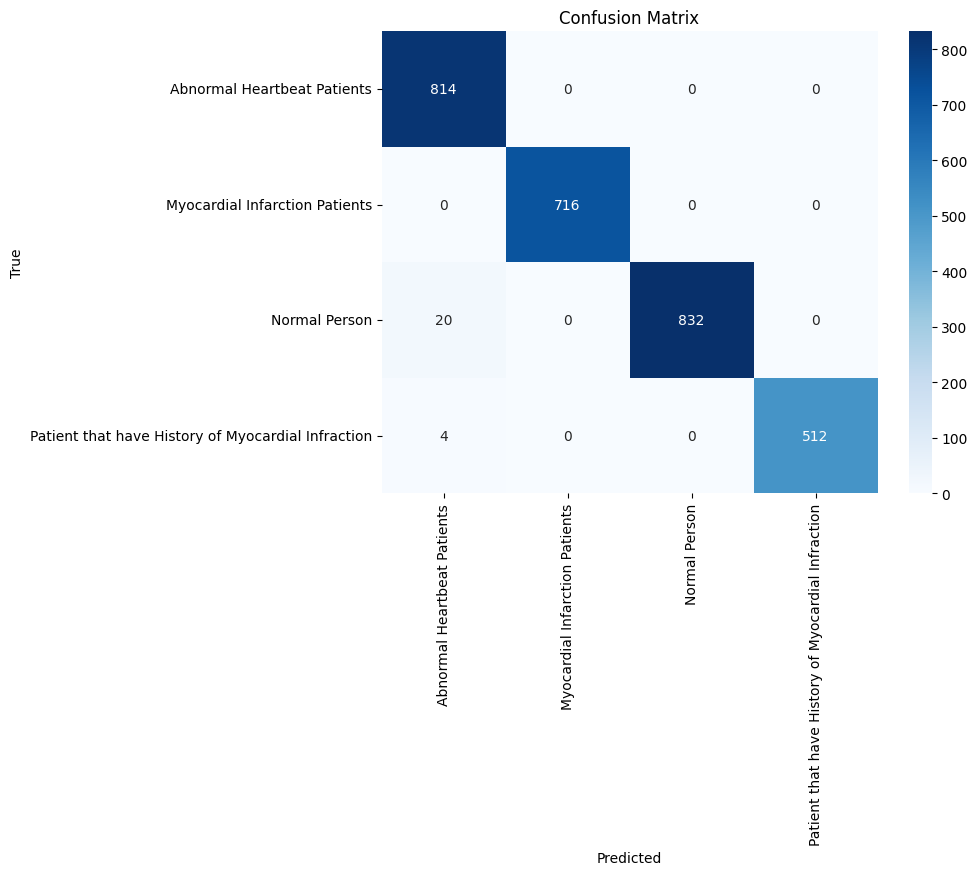

In [102]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [107]:
loss, acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {acc * 100:.2f}%")
print(f"Validation Loss: {loss:.4f}")


91/91 [==============================] - 86s 943ms/step - loss: 0.0449 - accuracy: 0.9917
Validation Accuracy: 99.17%
Validation Loss: 0.0449


In [81]:
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

def preprocess_ecg_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))  # ⬅️ Updated from 64 to 128
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    img = np.expand_dims(img, axis=0)   # Add batch dimension
    return img


In [82]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 1)),  # ⬅️ Updated input
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # Replace 4 with number of classes
])


In [83]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [86]:
img_path = '/content/Figure-3.png'
processed_img = preprocess_ecg_image(img_path)
prediction = model.predict(processed_img)
predicted_class = np.argmax(prediction)
print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 35ms/step
Predicted class: 2


In [109]:
IMG_SIZE = 255

def load_and_preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)
    return img


In [110]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the image data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values
    validation_split=0.2    # 20% for validation
)

# Now use it to create the training and validation data generators
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ecg_images/ECG Data',
    target_size=(255, 255),        # ← Increased size
    color_mode='grayscale',
    batch_size=16,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ecg_images/ECG Data',
    target_size=(255, 255),
    color_mode='grayscale',
    batch_size=16,
    class_mode='sparse',
    subset='validation',
    shuffle=True
)


Found 2320 images belonging to 4 classes.
Found 578 images belonging to 4 classes.


In [111]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(255, 255, 1)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4, activation='softmax')  # Adjust classes
])


In [112]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [113]:
# Step 2: Train the model
model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
145/145 [==============================] - 423s 3s/step - loss: 1.5311 - accuracy: 0.3073 - val_loss: 1.2319 - val_accuracy: 0.4654
Epoch 2/10
145/145 [==============================] - 420s 3s/step - loss: 0.7183 - accuracy: 0.7237 - val_loss: 0.3887 - val_accuracy: 0.8633
Epoch 3/10
145/145 [==============================] - 417s 3s/step - loss: 0.1511 - accuracy: 0.9478 - val_loss: 0.0832 - val_accuracy: 0.9758
Epoch 4/10
145/145 [==============================] - 418s 3s/step - loss: 0.0326 - accuracy: 0.9897 - val_loss: 0.0795 - val_accuracy: 0.9896
Epoch 5/10
145/145 [==============================] - 425s 3s/step - loss: 0.0067 - accuracy: 0.9991 - val_loss: 0.0923 - val_accuracy: 0.9931
Epoch 6/10
145/145 [==============================] - 420s 3s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1045 - val_accuracy: 0.9896
Epoch 7/10
145/145 [==============================] - 421s 3s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0878 - val_accuracy: 0.9896

In [115]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Plot Accuracy and Loss
def plot_training_curves(history):
    acc = np.array(history.history['accuracy']) * 100
    val_acc = np.array(history.history['val_accuracy']) * 100
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Evaluate on test set
def evaluate_and_report(model, test_generator):
    Y_pred = model.predict(test_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    print("Classification Report:\n")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# USAGE (in your notebook or script):
# plot_training_curves(history)
# evaluate_and_report(model, test_generator)


In [118]:
model.save("/content/ecg_model_255x255.h5")


1/1 [==============================] - 0s 109ms/step
Predicted Class: Abnormal
Confidence: 94.00%


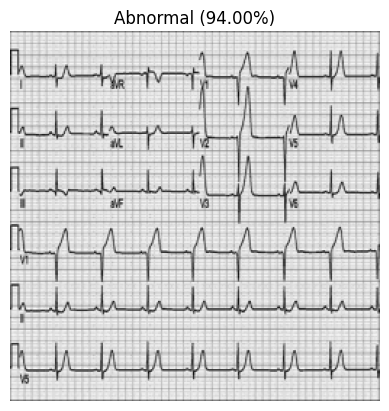

In [122]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the trained grayscale model
from keras.models import load_model
model = load_model('/content/ecg_model_255x255.h5')

# Convert uploaded image to PIL format
img = Image.open('/content/Myocardial_infarction_ECG.png').convert('L')  # 'L' converts to grayscale

# Resize to (255, 255) as per training
img = img.resize((255, 255))

# Convert to array and normalize
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 255, 255, 1)  # Add batch and channel dimensions

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
confidence = np.max(predictions[0]) * 100

# Class labels (edit if different)
class_labels = ['Abnormal', 'History of MI', 'Normal', 'Myocardial Infarction']

print(f"Predicted Class: {class_labels[predicted_class]}")
print(f"Confidence: {confidence:.2f}%")

# Show image
plt.imshow(img, cmap='gray')
plt.title(f"{class_labels[predicted_class]} ({confidence:.2f}%)")
plt.axis('off')
plt.show()


In [125]:
model = tf.keras.models.load_model('/content/ecg_model_255x255.h5')

In [126]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/ecg_images/ECG Data',
    target_size=(255, 255), # Updated target size
    color_mode='grayscale',
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

Found 2898 images belonging to 4 classes.


In [127]:
loss, acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {acc * 100:.2f}%")
print(f"Validation Loss: {loss:.4f}")


91/91 [==============================] - 176s 2s/step - loss: 0.0218 - accuracy: 0.9986
Validation Accuracy: 99.86%
Validation Loss: 0.0218


91/91 [==============================] - 173s 2s/step
Classification Report (255x255 images):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       814
           1       1.00      1.00      1.00       716
           2       1.00      1.00      1.00       852
           3       0.99      1.00      1.00       516

    accuracy                           1.00      2898
   macro avg       1.00      1.00      1.00      2898
weighted avg       1.00      1.00      1.00      2898

Weighted F1 Score (255x255 images): 0.9986


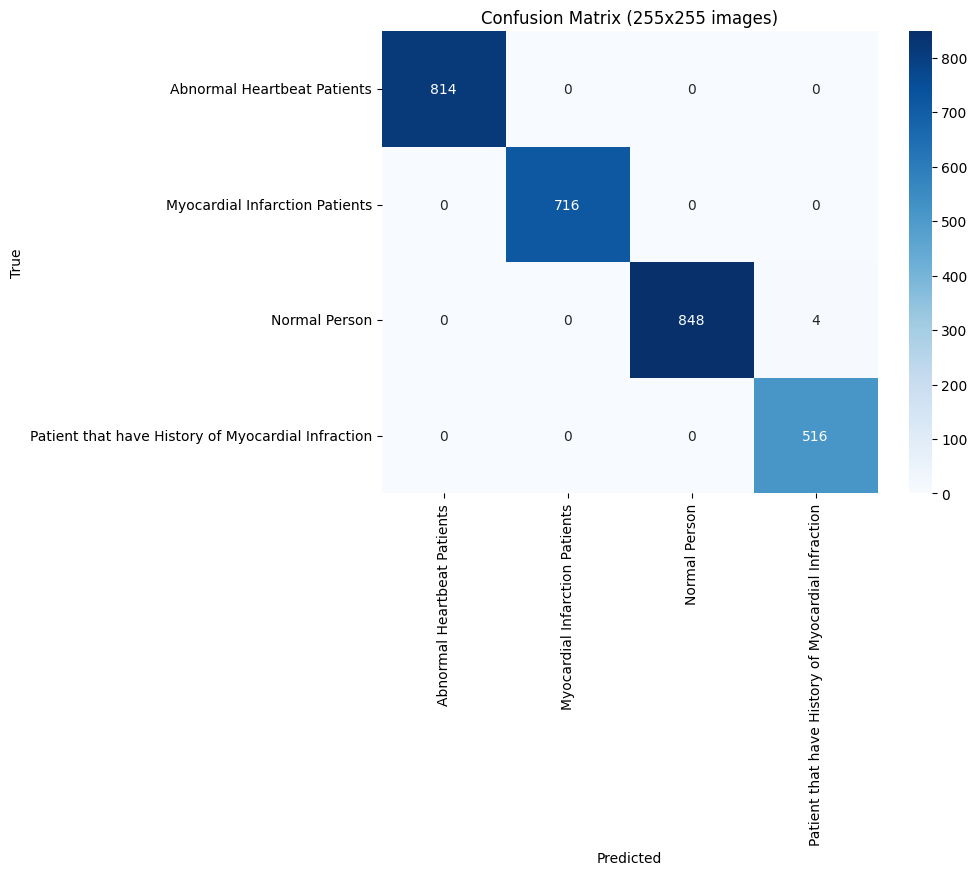

In [128]:
# Get true and predicted labels for 255x255 images
y_true_255 = val_generator.classes
y_pred_probs_255 = model.predict(val_generator)
y_pred_255 = np.argmax(y_pred_probs_255, axis=1)

# Classification report for 255x255 images
print("Classification Report (255x255 images):\n")
print(classification_report(y_true_255, y_pred_255))

# F1 Score for 255x255 images
f1_255 = f1_score(y_true_255, y_pred_255, average='weighted')
print(f"Weighted F1 Score (255x255 images): {f1_255:.4f}")

# Confusion Matrix for 255x255 images
cm_255 = confusion_matrix(y_true_255, y_pred_255)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_255, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (255x255 images)')
plt.show()